In [24]:
# MNIST Digit Classification with our own Framework

# Reading the Dataset

import sys
import gzip
import pickle

# If you are not running this notebook from a cloned repository, you may need to grab the binary dataset file first
# !wget https://github.com/mnielsen/neural-networks-and-deep-learning/blob/master/data/mnist.pkl.gz?raw=true
# In this case correct the link to the dataset below as well.

# Open a gzip-compressed file in binary 
with gzip.open('mnist.pkl.gz', 'rb') as mnist_pickle:   
    # If the Python version is greater than 2, it uses the encoding='latin1' parameter when calling pickle.load()
    # In Python 3.x, the pickle module expects Unicode strings by default, and the 'latin1' encoding ensures that the binary data is loaded correctly.                              
    if sys.version_info.major > 2:
        MNIST = pickle.load(mnist_pickle, encoding='latin1')
    # If the Python version is 2.x or lower, the code falls back to the regular pickle.load() without specifying the encoding parameter.     
    else:          
        MNIST = pickle.load(mnist_pickle)


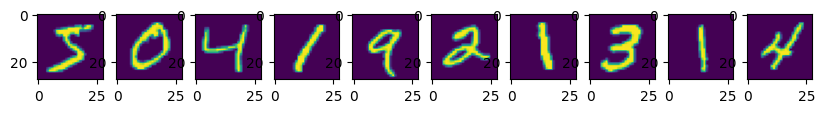

In [25]:
import pylab

labels = MNIST[0][1]    # MNIST['Train']['Labels']
data = MNIST[0][0]  # MNIST['Train']['Features']

fig = pylab.figure(figsize=(10,5))

for i in range(10):
    ax = fig.add_subplot(1,10,i+1)
    pylab.imshow(data[i].reshape(28,28))

pylab.show()

In [26]:
data.shape

(50000, 784)

In [27]:
# Splitting the Data

from sklearn.model_selection import train_test_split

features_train, features_test, labels_train, labels_test = train_test_split(data,labels,test_size=0.2)

print("Train samples: {len(features_train)}, test samples: {len(features_test)}")

Train samples: {len(features_train)}, test samples: {len(features_test)}


In [28]:
# Take the framework code from the lesson and paste it into this notebook, or (even better) into a separate Python module

import import_ipynb
import OwnFrameworkCopy as ownFramework

In [29]:
# Define and train one-layered perceptron, observing training and validation accuracy during training

import numpy as np

def get_loss_acc(x,y,loss=ownFramework.CrossEntropyLoss()):
    p = net.forward(x)
    l = loss.forward(p,y)
    pred = np.argmax(p,axis=1)
    acc = (pred==y).mean()
    return l,acc

def loss_to_string(features_train, labels_train, net, loss=ownFramework.CrossEntropyLoss(), batch_size=1568, learning_rate=0.1):
    print("Initial loss={}, accuracy={}: ".format(*get_loss_acc(features_train,labels_train)))     # The * before get_loss_acc(train_x,train_labels) unpacks the values returned by the function. 
    
    ownFramework.train_epoch(net, features_train, labels_train, loss, 1568, learning_rate)
    
    print("Final loss={}, accuracy={}: ".format(*get_loss_acc(features_train,labels_train)))
    print("Test loss={}, accuracy={}: ".format(*get_loss_acc(features_test,labels_test)))


In [30]:
# Try to understand if overfitting took place, and adjust layer parameters to improve accuracy

learning_rate=0.1
batch_size=1568

net = ownFramework.Net()
net.add(ownFramework.Linear(784,784))
net.add(ownFramework.Softmax())
loss = ownFramework.CrossEntropyLoss()
loss_to_string(features_train, labels_train, net, loss, batch_size, learning_rate)

'''
making changes on learning_rate and batch size, 
and running all of the cells so we can compare the values
without changing other values

learning_rate=0.1   batch_size=784  ->  initial accuracy=0.001125
                                        final accuracy=0.780925
                                        test accuracy=0.7804

learning_rate=0.2   batch_size=784  ->  initial accuracy=0.00015
                                        final accuracy=0.832775
                                        test accuracy=0.833      

learning_rate=0.4   batch_size=784  ->  initial accuracy=0.0001
                                        final accuracy=0.85495
                                        test accuracy=0.8593

learning_rate=0.8   batch_size=784  ->  initial accuracy=0.00015
                                        final accuracy=0.85775
                                        test accuracy=0.862       

learning_rate=1.6   batch_size=784  ->  initial accuracy=0.0068
                                        final accuracy=0.85     # decrease
                                        test accuracy=0.8445    # decrease

learning_rate=3.2   batch_size=784  ->  initial accuracy=0.000275
                                        final accuracy=0.7612   # decrease
                                        test accuracy=0.7604    # decrease                 

learning_rate=0.1   batch_size=1568 ->  initial accuracy=0.003125
                                        final accuracy=0.78455
                                        test accuracy=0.7843

learning_rate=0.2   batch_size=1568 ->  initial accuracy=0.0001
                                        final accuracy=0.832425
                                        test accuracy=0.8232      

learning_rate=0.4   batch_size=1568 ->  initial accuracy=0.0001
                                        final accuracy=0.85215
                                        test accuracy=0.8482

learning_rate=0.8   batch_size=1568 ->  initial accuracy=0.0018
                                        final accuracy=0.87075
                                        test accuracy=0.8648           

learning_rate=1.6   batch_size=1568 ->  initial accuracy=0.003275
                                        final accuracy=0.868875     # decrease
                                        test accuracy=0.8688

learning_rate=3.2   batch_size=1568 ->  initial accuracy=0.000425
                                        final accuracy=0.864425     # decrease
                                        test accuracy=0.8674        # decrease                                                                                              

'''


Initial loss=6.748331838801531, accuracy=0.000875: 
Final loss=1.328713161647182, accuracy=0.793: 
Test loss=1.333103380824707, accuracy=0.797: 


'\nmaking changes on learning_rate and batch size, \nand running all of the cells so we can compare the values\nwithout changing other values\n\nlearning_rate=0.1   batch_size=784  ->  initial accuracy=0.001125\n                                        final accuracy=0.780925\n                                        test accuracy=0.7804\n\nlearning_rate=0.2   batch_size=784  ->  initial accuracy=0.00015\n                                        final accuracy=0.832775\n                                        test accuracy=0.833      \n\nlearning_rate=0.4   batch_size=784  ->  initial accuracy=0.0001\n                                        final accuracy=0.85495\n                                        test accuracy=0.8593\n\nlearning_rate=0.8   batch_size=784  ->  initial accuracy=0.00015\n                                        final accuracy=0.85775\n                                        test accuracy=0.862       \n\nlearning_rate=1.6   batch_size=784  ->  initial accuracy=0.0068\n 

In [31]:
# Repeat previous steps for 2- and 3-layered perceptrons. Try to experiment with different activation functions between layers.

# 2-layered with tanh as activation function

net = ownFramework.Net()
net.add(ownFramework.Linear(784,784))
net.add(ownFramework.Tanh())
net.add(ownFramework.Linear(784,784))
net.add(ownFramework.Softmax())
loss = ownFramework.CrossEntropyLoss()

loss_to_string(features_train, labels_train, net, loss, batch_size, learning_rate)

Initial loss=6.758216610338497, accuracy=2.5e-05: 
Final loss=0.8778801922704981, accuracy=0.82395: 
Test loss=0.8783757355225446, accuracy=0.8279: 


In [32]:
class Elu:  # Exponential Linear Unit
    def forward(self,x,alpha=1.0):
        y = np.where(x >= 0, x, alpha * (np.exp(x) - 1))
        self.y = y
        self.x = x
        return y
    def backward(self,dy,alpha=1.0):
        return np.where(self.x >= 0, 1.0*dy, (alpha+self.y)*dy)

In [33]:
# 2-layered with elu as activation function

net = ownFramework.Net()
net.add(ownFramework.Linear(784,784))
net.add(Elu())
net.add(ownFramework.Linear(784,784))
net.add(ownFramework.Softmax())
loss = ownFramework.CrossEntropyLoss()

loss_to_string(features_train, labels_train, net, loss, batch_size, learning_rate)

Initial loss=6.634381881245064, accuracy=0.000575: 
Final loss=0.8337580232987204, accuracy=0.82555: 
Test loss=0.8346610199829334, accuracy=0.8255: 


In [34]:
# 3-layered with elu and tanh as activation functions

net = ownFramework.Net()
net.add(ownFramework.Linear(784,784))
net.add(Elu())
net.add(ownFramework.Linear(784,784))
net.add(ownFramework.Tanh())
net.add(ownFramework.Linear(784,784))
net.add(ownFramework.Softmax())
loss = ownFramework.CrossEntropyLoss()

loss_to_string(features_train, labels_train, net, loss, batch_size, learning_rate)

Initial loss=6.8095415287673475, accuracy=0.000425: 
Final loss=0.7751388870035909, accuracy=0.81805: 
Test loss=0.7760573063641992, accuracy=0.8173: 


In [35]:
from matplotlib import pyplot as plt

def plot_max_abs_weights(num_epochs, net, features_train, labels_train, loss, batch_size, learning_rate):
    fig, ax = plt.subplots(1, 1)
    ax.set_xlim(0, num_epochs + 1)
    ax.set_ylim(0,1)
    
    max_weights = []

    for epoch in range(1, num_epochs + 1):
        ownFramework.train_epoch(net, features_train, labels_train, loss, batch_size, learning_rate)
        max_abs_weight_epoch = 0.0
        for layer in net.layers:
            if isinstance(layer, ownFramework.Linear):
                max_abs_weight_layer = np.max(np.abs(layer.W))
                max_abs_weight_epoch = max(max_abs_weight_epoch, max_abs_weight_layer)

        max_weights.append(max_abs_weight_epoch)
    
    ax.set_ylim(0, np.max(max_weights)+0.1)
    ax.set_ylabel('$\mathcal{W}_{max_abs}$ (max abs value of weights)')
    ax.set_xlabel('$e$ (epoch)')

    for line in ax.lines:
        line.remove()
    
    i =  [i for i in range(1, len(max_weights)+1)]
    ax.plot(i,max_weights, 'b--')
    plt.show()
    fig.canvas.draw()
    fig.canvas.flush_events()


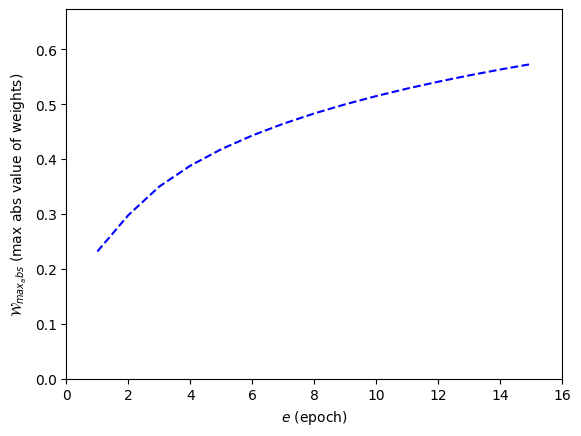

Initial loss=0.42715926842251684, accuracy=0.8875: 
Final loss=0.420694162635821, accuracy=0.8888: 
Test loss=0.4310393444607494, accuracy=0.8901: 


In [36]:
%matplotlib inline

net = ownFramework.Net()
net.add(ownFramework.Linear(784,784))
net.add(ownFramework.Softmax())
loss = ownFramework.CrossEntropyLoss()

plot_max_abs_weights(15, net, features_train, labels_train, loss, batch_size, learning_rate)
loss_to_string(features_train, labels_train, net, loss, batch_size, learning_rate)